# CrimeData

In [2]:
import pandas as pd
import numpy as np

In [3]:
import sklearn

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('crime_data.csv')

In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df.shape

(50, 5)

In [16]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [12]:
from sklearn import preprocessing

In [17]:
string_column=['Unnamed: 0']

In [18]:
number = preprocessing.LabelEncoder()
for i in string_column:
    df[i] = number.fit_transform(df[i])

In [19]:
from sklearn.preprocessing import StandardScaler#uses z scores

In [20]:
z=StandardScaler()

In [21]:
x=z.fit_transform(df)

In [22]:
x.shape

(50, 5)

In [26]:
df1=pd.DataFrame(data=x,columns=df.columns)

In [27]:
df1.shape

(50, 5)

In [28]:
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,-1.697749,1.255179,0.790787,-0.526195,-0.003451
1,-1.628453,0.513019,1.118060,-1.224067,2.509424
2,-1.559158,0.072361,1.493817,1.009122,1.053466
3,-1.489862,0.234708,0.233212,-1.084492,-0.186794
4,-1.420566,0.281093,1.275635,1.776781,2.088814


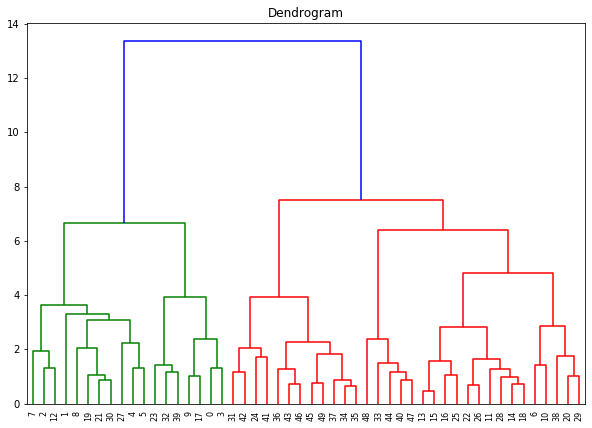

In [29]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(x,method='ward'))

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [39]:
cluster.fit_predict(x)

array([1, 3, 3, 1, 3, 3, 0, 3, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 3,
       0, 1, 2, 0, 0, 3, 0, 0, 3, 2, 1, 4, 2, 2, 2, 2, 0, 1, 4, 2, 2, 2,
       4, 2, 2, 4, 4, 2], dtype=int64)

In [33]:
from sklearn.cluster import KMeans

In [48]:
km=KMeans(n_clusters=5)

In [49]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
km.predict(x)

array([3, 2, 2, 0, 2, 2, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 4, 1, 2, 2, 3, 4, 1, 1, 1, 1, 1, 3, 4, 3, 1, 1,
       4, 1, 1, 4, 4, 1])

In [51]:
k=[2,3,4,5,6,7,8]
inertia=[]
for c in k:
    km=KMeans(n_clusters=c)
    km.fit(x)
    inertia.append(km.inertia_)

In [52]:
len(inertia)

7

Text(0, 0.5, 'Average Distance from Centroid')

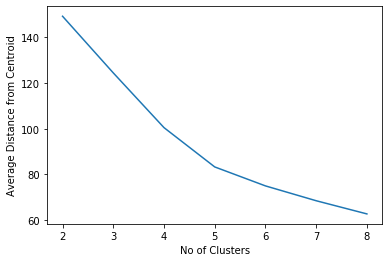

In [53]:
plt.plot(k,inertia)
plt.xlabel("No of Clusters")
plt.ylabel("Average Distance from Centroid")

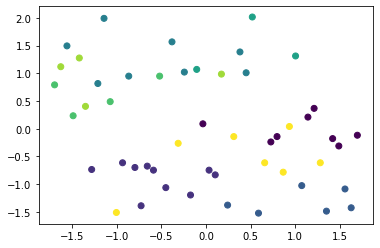

In [54]:
plt.scatter(x[:,0],x[:,2],c=km.labels_)

# Airlines

In [100]:
df=pd.read_csv('EastWestAirlines.csv')

In [101]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [102]:
df.shape

(3999, 12)

In [103]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [104]:
x1=z.fit_transform(df)

In [108]:
df1=pd.DataFrame(data=x1,columns=df.columns)

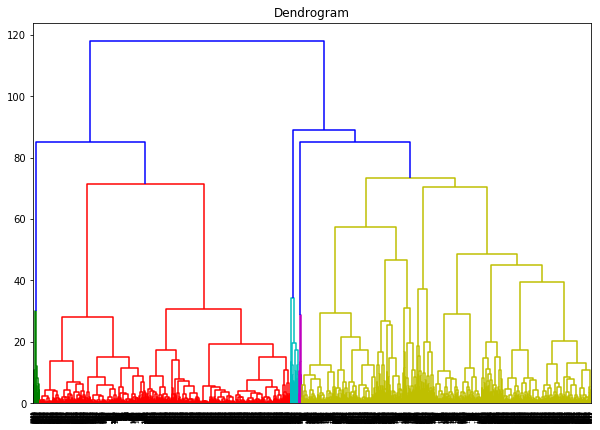

In [107]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(x1,method='ward'))

In [109]:
cluster1=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [110]:
cluster1.fit(x1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000001FDD3B0E598>)

In [112]:
cluster1.fit_predict(x1)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

# Using K means

In [113]:
k=[2,3,4,5,6,7,8,9,10,11,12]
inertia=[]
for c in k:
    km=KMeans(n_clusters=c)
    km.fit(x1)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Average Distance from Centroid')

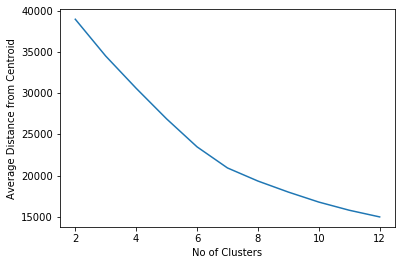

In [114]:
plt.plot(k,inertia)
plt.xlabel("No of Clusters")
plt.ylabel("Average Distance from Centroid")

In [115]:
km=KMeans(n_clusters=6)

In [116]:
km.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
p=km.predict(x1)

In [126]:
np.unique(p)

array([0, 1, 2, 3, 4, 5])